In [110]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import moviepy.video.io.ImageSequenceClip

In [111]:
# define the input directory
run_dir = '/Users/lbayne/desktop/ms274/model_output/diags'

In [112]:
delX = 1/625
delY = 19/10000
xgOrigin = -122.2635
ygOrigin = 36.5436
n_rows = 245
n_cols = 300

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

In [121]:
#canyon head so near shore and high fluctuations
row = 140
col = 270

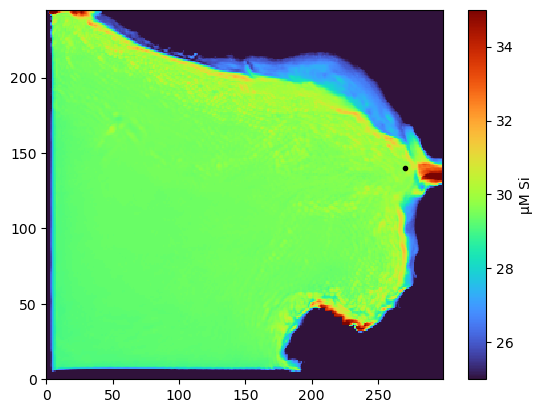

In [122]:
grid = np.fromfile(os.path.join(run_dir,'BGC_daily_Si',
                                'daily_Si.0000002880.data'), '>f4')
grid = grid.reshape((90,n_rows,n_cols))

C = plt.pcolormesh(grid[0,:,:-1], cmap='turbo', vmin=25,vmax=35)
plt.plot(col,row,'k.')
plt.colorbar(C, label='µM Si')
plt.show()

In [123]:
deltaT = 30
timestep_numbers = []

for file_name in sorted(os.listdir(os.path.join(run_dir, 'BGC_daily_Si'))):
    if file_name.endswith('.data'):
        timestep_numbers.append(int(file_name.split('.')[-2]))

# Convert to days since Jan 1
days_since_jan1 = np.array(timestep_numbers) * deltaT / 86400


# ---------- 2. Read Si ----------
Si_values = []

for file_name in sorted(os.listdir(os.path.join(run_dir,'BGC_daily_Si'))):
    if file_name.endswith('.data'):
        grid = np.fromfile(os.path.join(run_dir, 'BGC_daily_Si', file_name), '>f4')
        grid = grid.reshape((90, n_rows, n_cols))
        Si_values.append(grid[0, row, col])


# ---------- 3. Read Temperature and Salinity together ----------
T_values = []
sal_values = []

for file_name in sorted(os.listdir(os.path.join(run_dir,'TS_surf_daily_mean'))):
    if file_name.endswith('.data'):
        grid = np.fromfile(os.path.join(run_dir,'TS_surf_daily_mean', file_name), '>f4')
        grid = grid.reshape((2, n_rows, n_cols))

        T_values.append(grid[0, row, col])
        sal_values.append(grid[1, row, col])

In [132]:
upwelling_event_1 = 386000
upwelling_event_2 = 362000
upwelling_event_3 = 439000

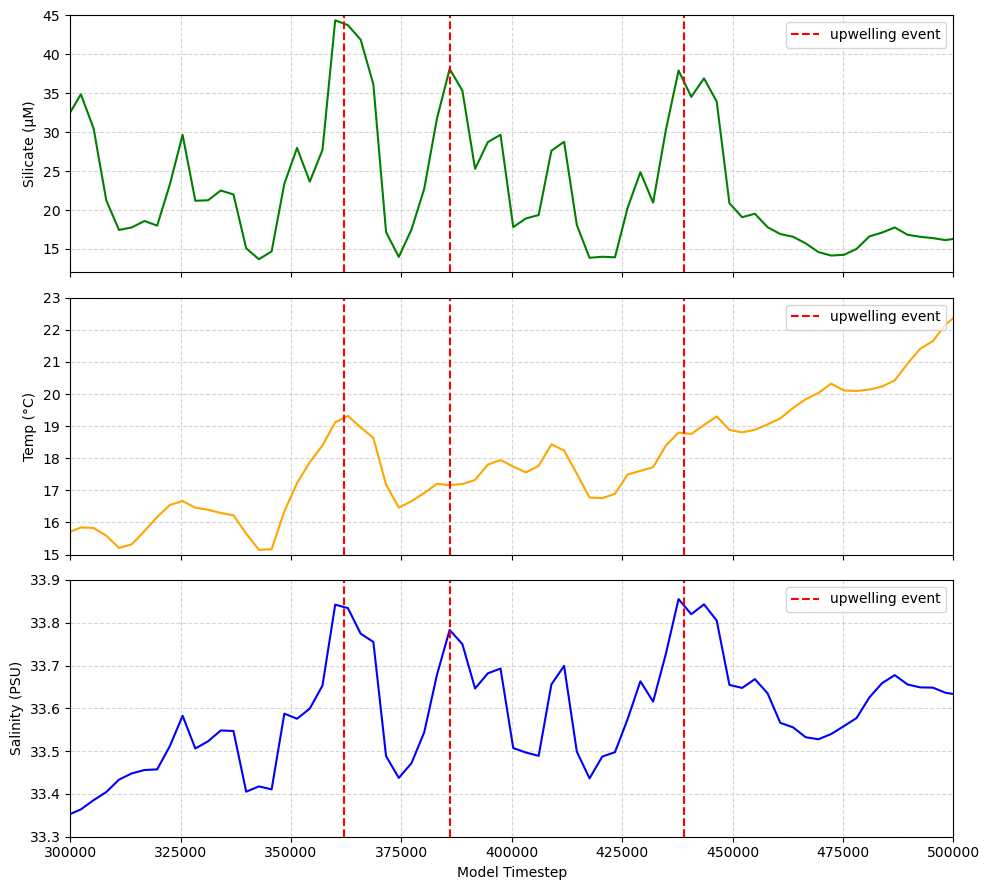

In [136]:
fig, ax = plt.subplots(3, 1, figsize=(10,9), sharex=True)

# Silicate
ax[0].plot(timestep_numbers, Si_values, 'green')
ax[0].set_ylabel('Silicate (µM)')
ax[0].grid(linestyle='--', alpha=0.5)
ax[0].set_xlim(300000, 500000)
ax[0].axvline(x=upwelling_event_1, color='red', linestyle='--', linewidth=1.5) #3.8 day lag
ax[0].axvline(x=upwelling_event_2, color='red', linestyle='--', linewidth=1.5) #3.4 day lag
ax[0].axvline(x=upwelling_event_3, color='red', linestyle='--', linewidth=1.5, label = 'upwelling event') #3.4 day lag
ax[0].set_ylim(12, 45)
ax[0].legend(loc='upper right')


# Temperature
ax[1].plot(timestep_numbers, T_values, 'orange')
ax[1].set_ylabel('Temp (°C)')
ax[1].grid(linestyle='--', alpha=0.5)
ax[1].set_xlim(300000, 500000)
ax[1].axvline(x=upwelling_event_1, color='red', linestyle='--', linewidth=1.5)
ax[1].axvline(x=upwelling_event_2, color='red', linestyle='--', linewidth=1.5)
ax[1].axvline(x=upwelling_event_3, color='red', linestyle='--', linewidth=1.5, label = 'upwelling event')
ax[1].set_ylim(15, 23)
ax[1].legend(loc='upper right')

# Salinity
ax[2].plot(timestep_numbers, sal_values, 'blue')
ax[2].set_ylabel('Salinity (PSU)')
ax[2].set_xlabel('Model Timestep')
ax[2].grid(linestyle='--', alpha=0.5)
ax[2].set_xlim(300000, 500000)
ax[2].axvline(x=upwelling_event_1, color='red', linestyle='--', linewidth=1.5)
ax[2].axvline(x=upwelling_event_2, color='red', linestyle='--', linewidth=1.5)
ax[2].axvline(x=upwelling_event_3, color='red', linestyle='--', linewidth=1.5, label = 'upwelling event')
ax[2].set_ylim(33.3, 33.9)
ax[2].legend(loc='upper right')

plt.tight_layout()
plt.savefig('/Users/lbayne/desktop/ms274/model_output/nearshore_timeseries.png', dpi=300)

Potential upwelling events are suggested by the elevated silicate concentrations and higher salinities. However, the accompanying temperatures are not consistent with classic upwelling, which should produce much colder surface waters. Because this sampling site is so close to shore, the signal may instead reflect advection of offshore waters that are both nutrient-rich and relatively warm, rather than freshly upwelled. Another possibility is vertical advection within Monterey Bay, where nutrient-rich subsurface waters are mixed upward without fully cooling the surface layer. In either case, the result is water that is nutrient enriched but not as salty or cold as expected from direct, local upwelling.